# H의 값에 따라서 결과가 달라진다.

결론 : 모델이 학습한 모양은 그대로 유지하고, h의 값에 따라서 해당 모양의 정도가 바뀜

In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    df = df_daily.reset_index()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df

# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')

df = pd.concat((df1,df2,df4,df6,df7,df8))

m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  n_forecasts=10,
                  drop_missing = True
                  )

m = m.add_future_regressor(name='H', normalize=True)
metrics = m.fit(df)

H값의 차이가 큰 3번 data와 5번 data를 테스트 데이터로 사용

- data3[297] = 3.958
- data5[297] = 4.836

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster.__handle_missing_data) - 236 missing values in column H were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 236 NaN values in column H were auto-imputed.


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,10,data3,-9.177283,0.822717,0.822717,0.000000,0.000000
1,2021-08-07,10,data3,-8.802784,1.197216,1.187669,0.009547,0.009547
2,2021-08-08,10,data3,-8.428286,1.571714,1.552621,0.019094,0.019094
3,2021-08-09,10,data3,-8.053787,1.946213,1.917572,0.028640,0.028640
4,2021-08-10,10,data3,-7.679289,2.320711,2.282524,0.038187,0.038187
...,...,...,...,...,...,...,...,...
293,2022-05-26,10,data3,46.463501,56.463501,54.936012,1.527488,1.527488
294,2022-05-27,10,data3,46.479542,56.479542,54.952053,1.527488,1.527488
295,2022-05-28,10,data3,46.495583,56.495583,54.968094,1.527488,1.527488
296,2022-05-29,10,data3,46.511623,56.511623,54.984135,1.527488,1.527488


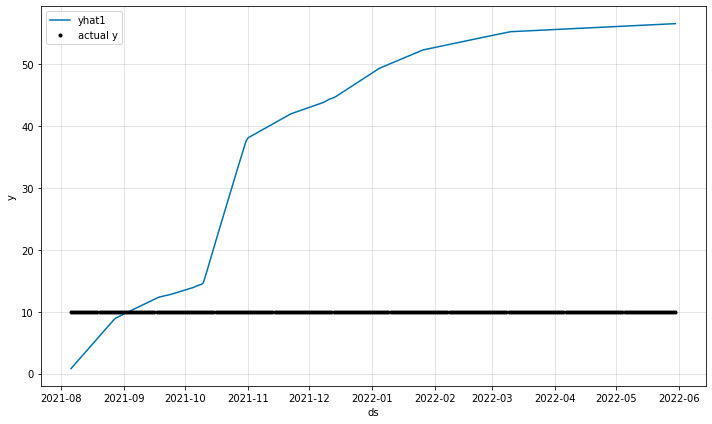

In [126]:
df3_test = df3.copy()
df3_test['y'] = 10

forecast3 = m.predict(df3_test)
m.plot(forecast3)

pd.set_option('display.max_rows', 10)
forecast3

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.0,data3,0.822717,0.822717,0.822717,0.0,0.0
1,2021-08-07,NaN,data3,NaN,1.187669,1.187669,0.0,0.0
2,2021-08-08,NaN,data3,NaN,1.552621,1.552621,0.0,0.0
3,2021-08-09,NaN,data3,NaN,1.917572,1.917572,0.0,0.0
4,2021-08-10,NaN,data3,NaN,2.282524,2.282524,0.0,0.0
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data3,NaN,54.936012,54.936012,0.0,0.0
294,2022-05-27,55.8,data3,-0.847947,54.952053,54.952053,0.0,0.0
295,2022-05-28,NaN,data3,NaN,54.968094,54.968094,0.0,0.0
296,2022-05-29,NaN,data3,NaN,54.984135,54.984135,0.0,0.0


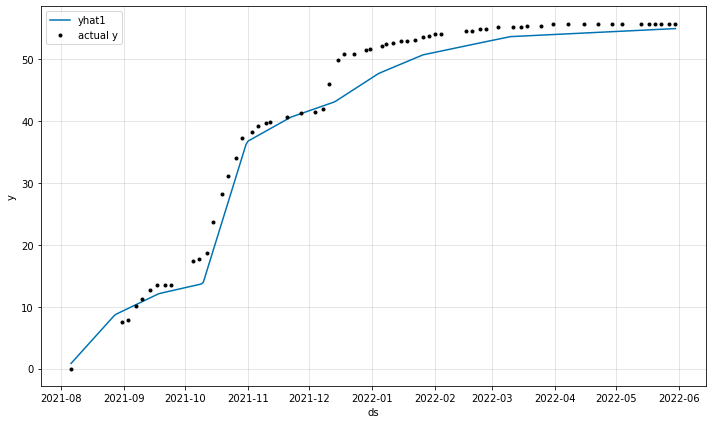

In [130]:
df_h = df3.copy()
df_h['H'] = 0
forecast_h = m.predict(df_h)
m.plot(forecast_h)

pd.set_option('display.max_rows', 10)
forecast_h

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster.__handle_missing_data) - 234 missing values in column H were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 234 NaN values in column H were auto-imputed.


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data5,0.822717,0.822717,0.822717,0.000000,0.000000
1,2021-08-07,NaN,data5,NaN,1.203580,1.187669,0.015911,0.015911
2,2021-08-08,NaN,data5,NaN,1.584443,1.552621,0.031823,0.031823
3,2021-08-09,NaN,data5,NaN,1.965306,1.917572,0.047734,0.047734
4,2021-08-10,NaN,data5,NaN,2.346169,2.282524,0.063645,0.063645
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data5,NaN,56.797638,54.936012,1.861627,1.861627
294,2022-05-27,57.288,data5,-0.474321,56.813679,54.952053,1.861627,1.861627
295,2022-05-28,NaN,data5,NaN,56.829720,54.968094,1.861627,1.861627
296,2022-05-29,NaN,data5,NaN,56.845760,54.984135,1.861627,1.861627


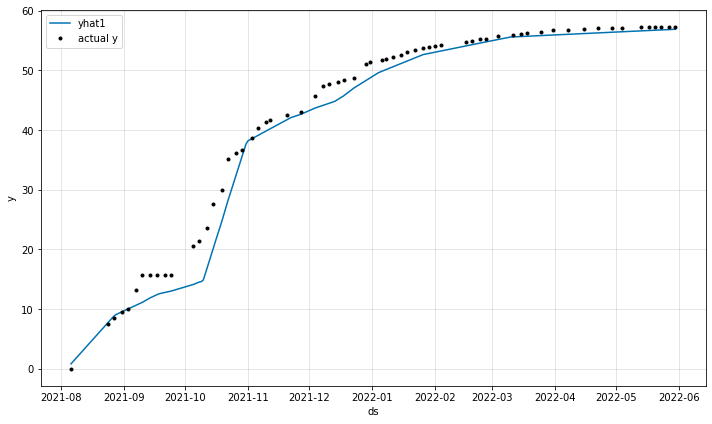

In [110]:
forecast5 = m.predict(df5)
m.plot(forecast5)

pd.set_option('display.max_rows', 10)
forecast5
